In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utilities import utils
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### Analytics on model predictions

In [2]:
query = '''
    select
        avg(low_abs_error) as mean_absolute_error_low
      , avg(high_abs_error) as mean_absolute_error_high
      , 100 * sum(n_loss_low) / count(*) as loss_rate_low
      , 100 * sum(n_loss_high) / count(*) as loss_rate_high
    from dbt.eval_speculation
    '''
df = utils.query_db(query=query)
df.head(10)

,mean_absolute_error_low,mean_absolute_error_high,loss_rate_low,loss_rate_high
0,0.040028,0.05412,44,56


In [3]:
query = '''
    select *
    from dbt.eval_speculation
    order by symbol, market_datetime
    '''
df = utils.query_db(query=query)
df.head(10)

,low_model_id,high_model_id,market_datetime,symbol,sector,industry,closing_price,target_low,target_high,prediction_low,prediction_high,low_error,low_abs_error,high_error,high_abs_error,is_loss_low,is_loss_high,n_loss_low,n_loss_high
0,s3,s4,2020-08-03,A,capital_goods,biotechnology_laboratory_analytical_instruments,99.09,97.63,99.1200,99.079912,101.914687,0.014851,0.014851,0.028195,0.028195,False,False,0,0
1,s3,s4,2020-08-04,A,capital_goods,biotechnology_laboratory_analytical_instruments,97.53,97.63,99.1200,97.427478,99.844565,-0.002074,0.002074,0.007310,0.007310,True,False,1,0
2,s3,s4,2020-08-05,A,capital_goods,biotechnology_laboratory_analytical_instruments,97.89,97.63,99.4025,97.867583,101.164900,0.002434,0.002434,0.017730,0.017730,False,False,0,0
3,s3,s4,2020-08-06,A,capital_goods,biotechnology_laboratory_analytical_instruments,97.45,97.63,99.4025,97.254922,100.778092,-0.003842,0.003842,0.013839,0.013839,True,False,1,0
4,s3,s4,2020-08-07,A,capital_goods,biotechnology_laboratory_analytical_instruments,97.78,97.63,99.4025,97.816950,101.063657,0.001915,0.001915,0.016711,0.016711,False,False,0,0
5,s3,s4,2020-08-10,A,capital_goods,biotechnology_laboratory_analytical_instruments,97.14,97.63,99.4025,96.666176,99.419081,-0.009872,0.009872,0.000167,0.000167,True,False,1,0
6,s3,s4,2020-08-11,A,capital_goods,biotechnology_laboratory_analytical_instruments,96.30,98.17,99.4025,96.323476,98.624234,-0.018809,0.018809,-0.007829,0.007829,True,True,1,1
7,s3,s4,2020-08-12,A,capital_goods,biotechnology_laboratory_analytical_instruments,97.63,98.17,99.7300,97.639439,100.325349,-0.005405,0.005405,0.005970,0.005970,True,False,1,0
8,s3,s4,2020-08-13,A,capital_goods,biotechnology_laboratory_analytical_instruments,98.77,98.17,99.7300,98.848146,101.593560,0.006908,0.006908,0.018686,0.018686,False,False,0,0
9,s3,s4,2020-08-14,A,capital_goods,biotechnology_laboratory_analytical_instruments,97.37,98.17,99.9300,97.255417,97.979308,-0.009316,0.009316,-0.019521,0.019521,True,True,1,1


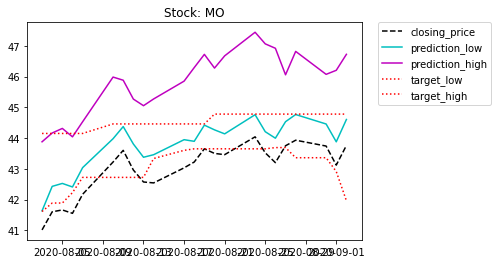

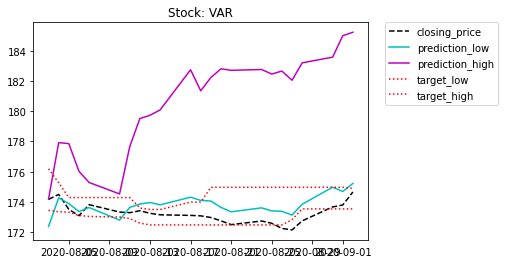

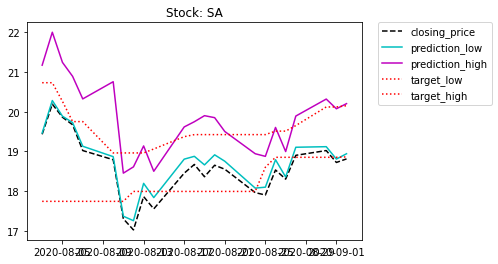

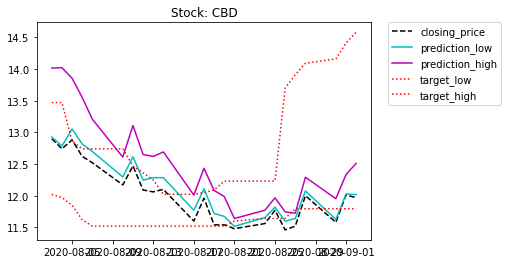

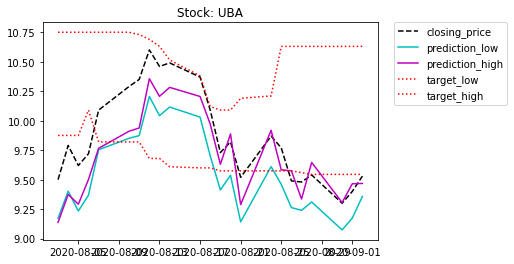

In [10]:
CLOSE_PRICE = 'closing_price'
MARKET_DATETIME = 'market_datetime'
PREDICTION_LOW = 'prediction_low'
PREDICTION_HIGH = 'prediction_high'
TARGET_LOW = 'target_low'
TARGET_HIGH = 'target_high'
SYMBOL = 'symbol'

stocks = np.random.choice(df[SYMBOL].unique(), 5)

for s in stocks:
    x = df[df[SYMBOL]==s]
    plt.title(f'Stock: {s}')
    plt.plot(x[MARKET_DATETIME], x[CLOSE_PRICE], label=CLOSE_PRICE, linestyle='--', color='black')

    plt.plot(x[MARKET_DATETIME], x[PREDICTION_LOW], label=PREDICTION_LOW, color='c')
    plt.plot(x[MARKET_DATETIME], x[PREDICTION_HIGH], label=PREDICTION_HIGH, color='m')

    plt.plot(x[MARKET_DATETIME], x[TARGET_LOW], label=TARGET_LOW, linestyle=':', color='r')
    plt.plot(x[MARKET_DATETIME], x[TARGET_HIGH], label=TARGET_HIGH, linestyle=':', color='r')

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()
